In [ ]:
 # Google Colab에서 한글 폰트 설치
!sudo apt-get install -y fonts-nanum

# 설치된 한글 폰트 확인
!fc-list :lang=ko | grep Nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,620 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and dire

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔고딕 폰트 경로 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib에서 한글 폰트 기본 설정
plt.rc('font', family=font_prop.get_name())

# 폰트 캐시 갱신 (Colab에서는 _rebuild() 대신 캐시 삭제 후 업데이트)
mpl.font_manager.fontManager.addfont(font_path)
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

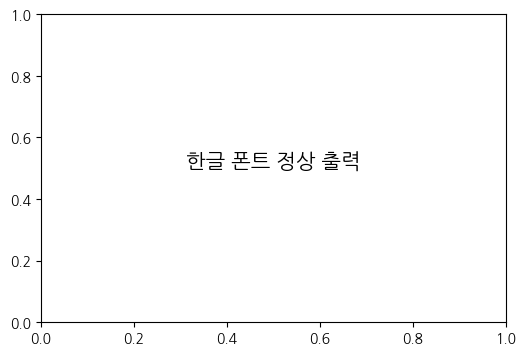

In [ ]:
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, "한글 폰트 정상 출력", fontsize=15, ha='center')
plt.show()

# **건강데이터_기본**

In [ ]:
#건강데이터_기본

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

# 올바른 파일 경로 확인
# Make sure this path is correct by copying it from your Google Drive in Colab
data_zip_path = '/content/drive/MyDrive/1차 플젝/건강데이터_기본.csv'

# CSV 파일 읽기
health = pd.read_csv(data_zip_path, encoding = 'cp949')

# 데이터 확인
health.head()

,ID,날짜,나이,성별,키,체중,운동 유형,지속 시간,강도,칼로리 소모,...,스트레스 수준,매일 걸음수,체내 수분 함량,BMI,휴식 심박수,수축기 혈압,이완기 혈압,건강 상태,흡연 상태,체력 수준
0,1,2024-01-01,56,F,165.3,53.7,Dancing,41,Low,3.3,...,3,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04
1,1,2024-01-04,56,F,165.3,53.9,Swimming,28,Low,2.9,...,7,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07
2,1,2024-01-05,56,F,165.3,54.2,Swimming,21,Medium,2.6,...,7,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09
3,1,2024-01-07,56,F,165.3,54.4,Weight Training,99,Medium,10.7,...,8,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21
4,1,2024-01-09,56,F,165.3,54.7,Swimming,100,Medium,12.7,...,1,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33


<Axes: >

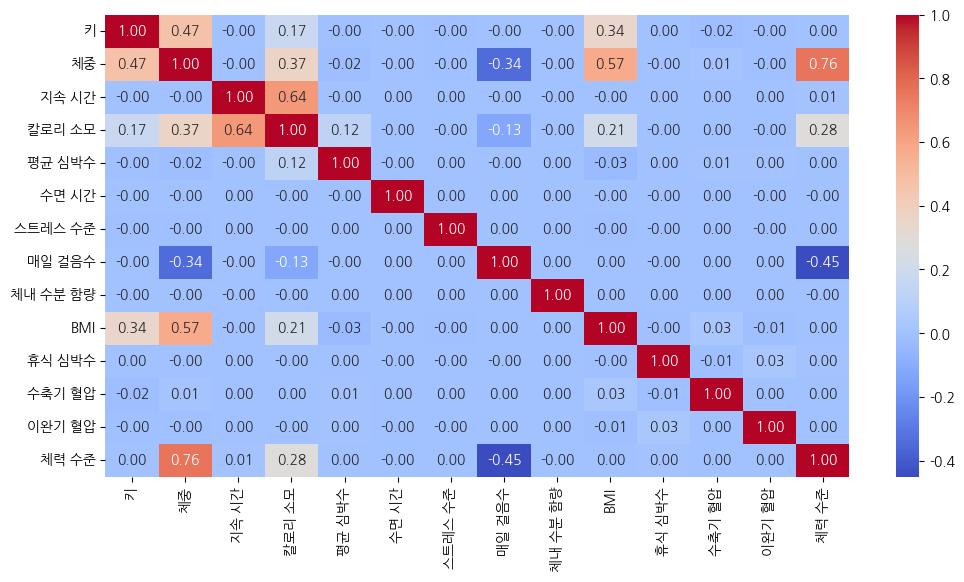

In [ ]:
correlation_df = health.drop(["성별","운동 유형","강도","건강 상태","흡연 상태","ID","날짜","나이"], axis=1)
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

In [ ]:
# 데이터 샘플링 (랜덤 2000개 데이터 사용하여 연산 속도 개선)
health_sample = health.sample(n=min(2000, len(health)), random_state=42)


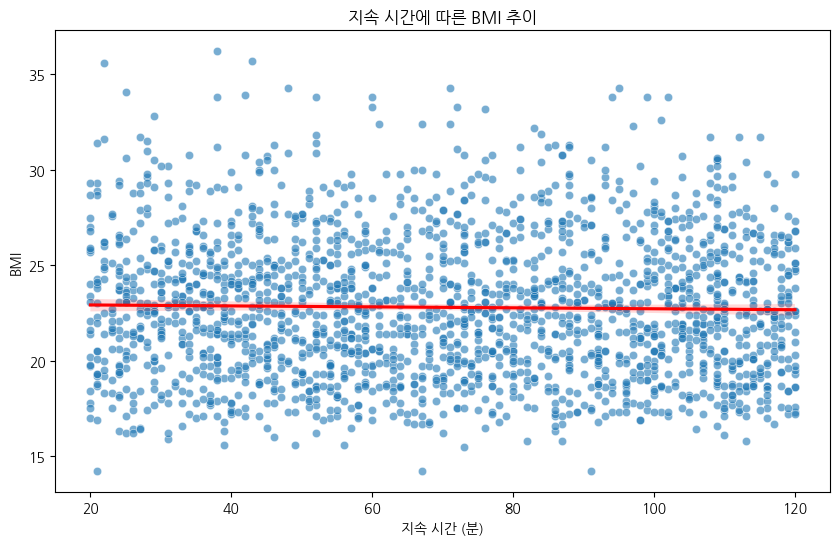

In [ ]:
# 2. 지속 시간에 따른 BMI 추이 분석
plt.figure(figsize=(10, 6))
sns.scatterplot(x='지속 시간', y='BMI', data=health_sample, alpha=0.6)
sns.regplot(x='지속 시간', y='BMI', data=health_sample, scatter=False, color='red')
plt.title('지속 시간에 따른 BMI 추이')
plt.xlabel('지속 시간 (분)')
plt.ylabel('BMI')
plt.show()


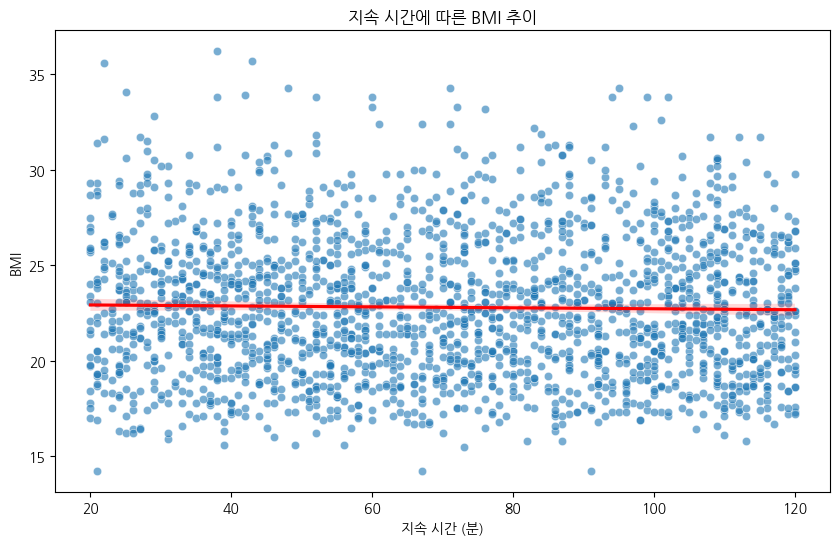

In [ ]:
# 데이터 샘플링 (랜덤 2000개 데이터 사용하여 연산 속도 개선)
health_sample = health.sample(n=min(2000, len(health)), random_state=42)

# 지속 시간에 따른 BMI 추이 분석 (샘플 데이터 활용)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='지속 시간', y='BMI', data=health_sample, alpha=0.6)
sns.regplot(x='지속 시간', y='BMI', data=health_sample, scatter=False, color='red')
plt.title('지속 시간에 따른 BMI 추이')
plt.xlabel('지속 시간 (분)')
plt.ylabel('BMI')
plt.show()


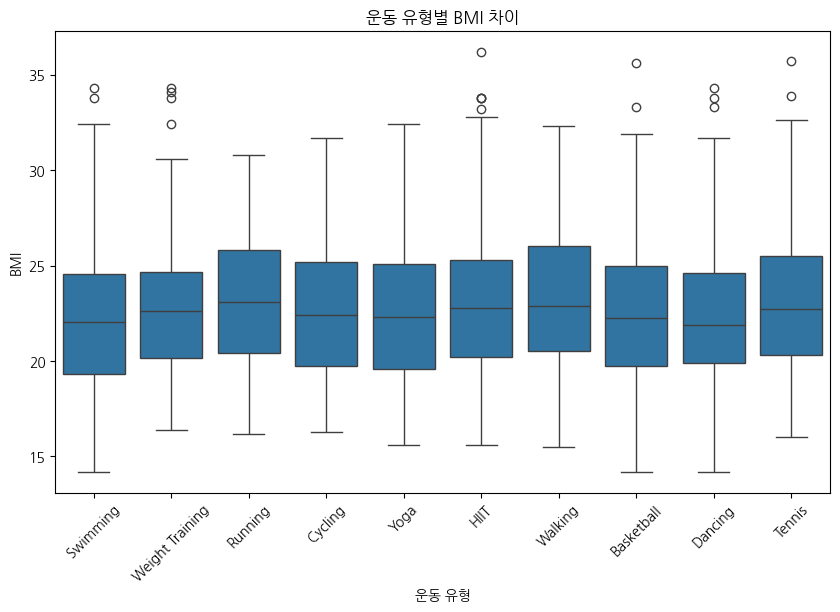

In [ ]:
# 3. 운동 유형에 따른 BMI 차이 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='운동 유형', y='BMI', data=health_sample)
plt.xticks(rotation=45)
plt.title('운동 유형별 BMI 차이')
plt.xlabel('운동 유형')
plt.ylabel('BMI')
plt.show()


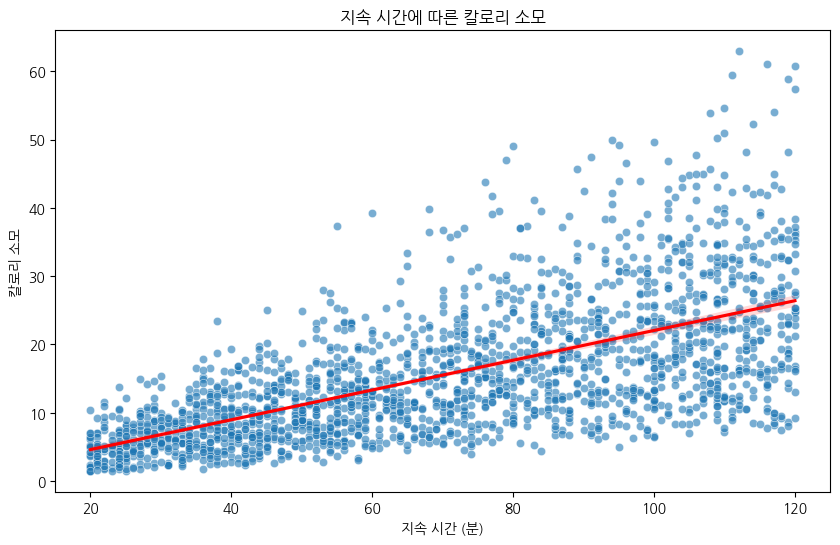

In [ ]:
# 4. 지속 시간에 따른 칼로리 소모 분석
plt.figure(figsize=(10, 6))
sns.scatterplot(x='지속 시간', y='칼로리 소모', data=health_sample, alpha=0.6)
sns.regplot(x='지속 시간', y='칼로리 소모', data=health_sample, scatter=False, color='red')
plt.title('지속 시간에 따른 칼로리 소모')
plt.xlabel('지속 시간 (분)')
plt.ylabel('칼로리 소모')
plt.show()


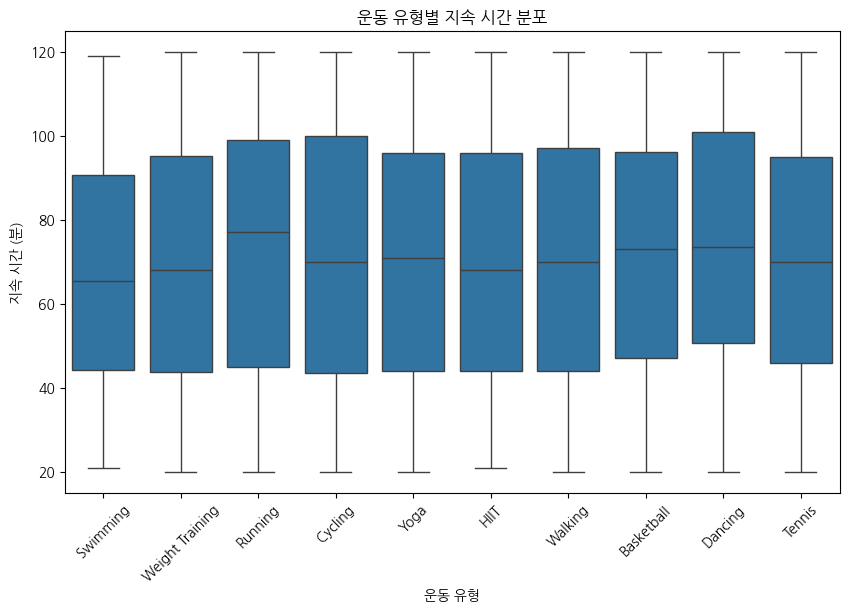

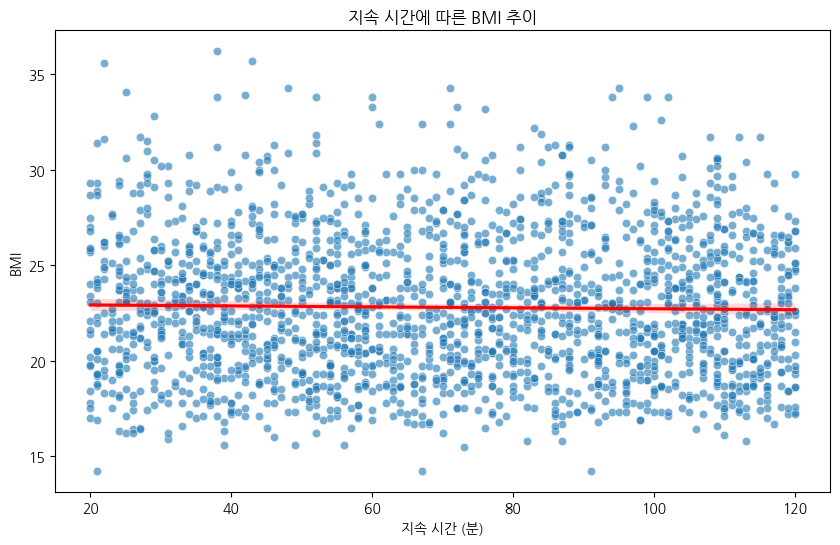

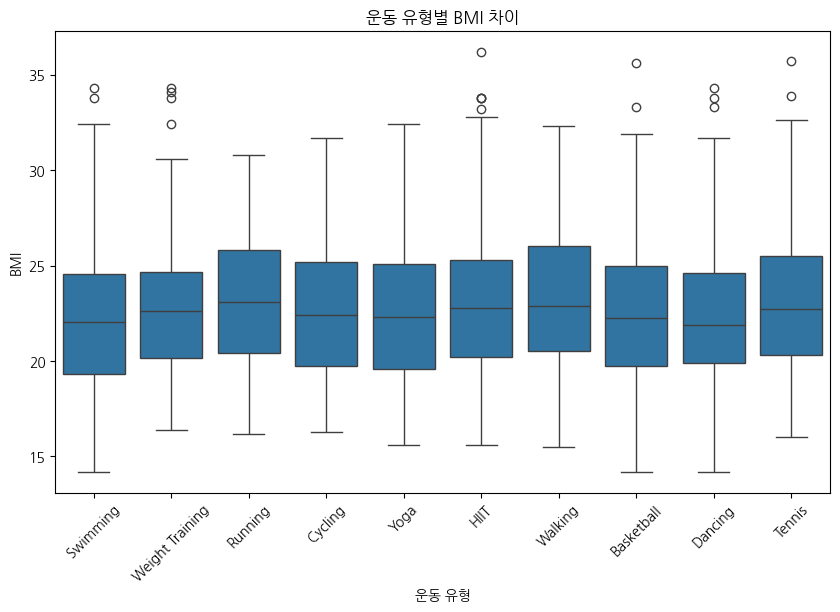

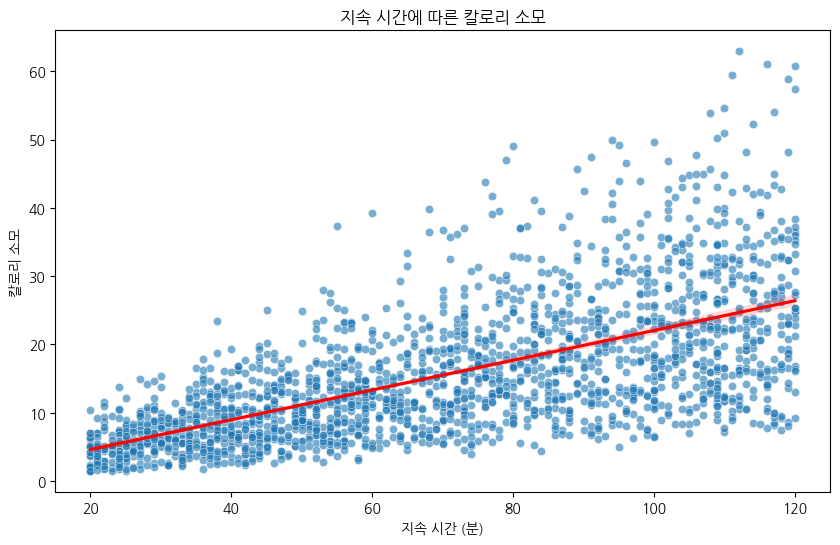

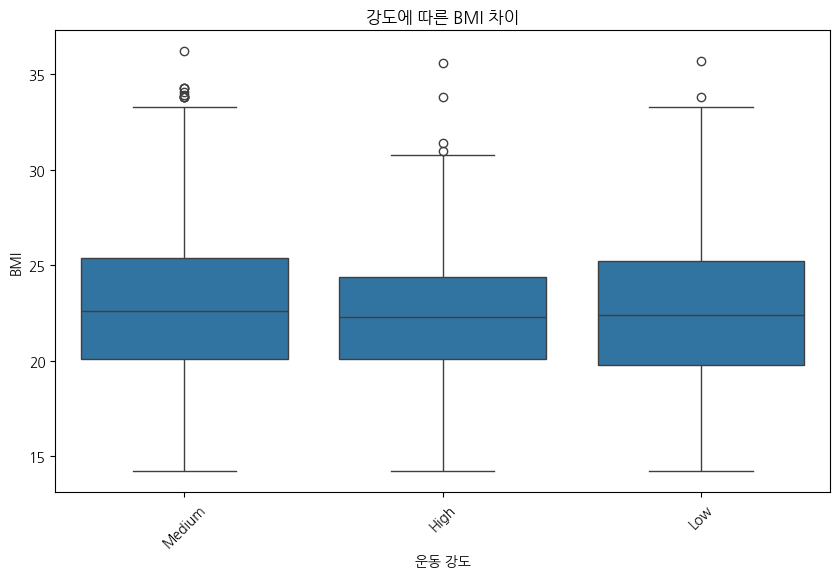

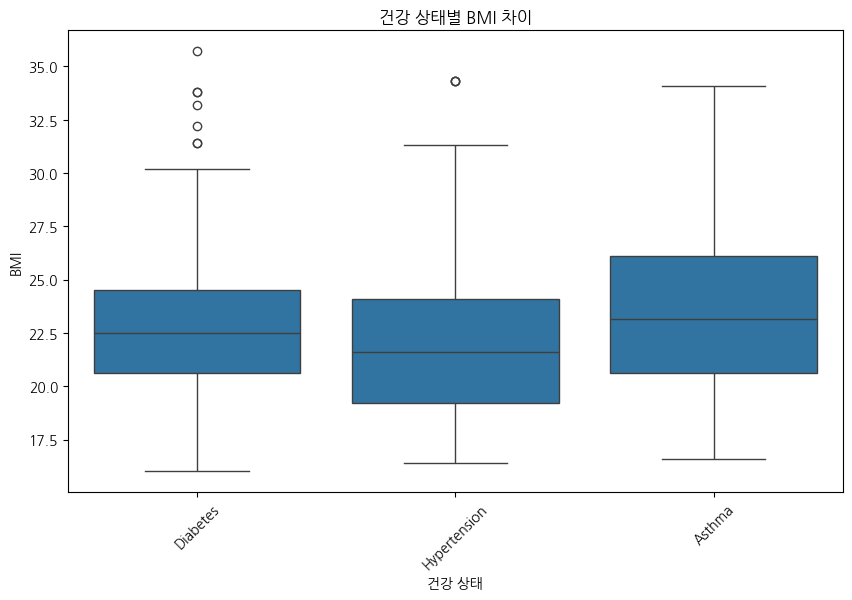

In [ ]:
# 2000개 랜덤 샘플 추출 (데이터가 2000개 미만이면 전체 사용)
health_sample = health.sample(n=min(2000, len(health)), random_state=42)

# 1. 지속 시간과 운동 유형 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='운동 유형', y='지속 시간', data=health_sample)
plt.xticks(rotation=45)
plt.title('운동 유형별 지속 시간 분포')
plt.xlabel('운동 유형')
plt.ylabel('지속 시간 (분)')
plt.show()

# 2. 지속 시간에 따른 BMI 추이 분석
plt.figure(figsize=(10, 6))
sns.scatterplot(x='지속 시간', y='BMI', data=health_sample, alpha=0.6)
sns.regplot(x='지속 시간', y='BMI', data=health_sample, scatter=False, color='red')
plt.title('지속 시간에 따른 BMI 추이')
plt.xlabel('지속 시간 (분)')
plt.ylabel('BMI')
plt.show()

# 3. 운동 유형에 따른 BMI 차이 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='운동 유형', y='BMI', data=health_sample)
plt.xticks(rotation=45)
plt.title('운동 유형별 BMI 차이')
plt.xlabel('운동 유형')
plt.ylabel('BMI')
plt.show()

# 4. 지속 시간에 따른 칼로리 소모 분석
plt.figure(figsize=(10, 6))
sns.scatterplot(x='지속 시간', y='칼로리 소모', data=health_sample, alpha=0.6)
sns.regplot(x='지속 시간', y='칼로리 소모', data=health_sample, scatter=False, color='red')
plt.title('지속 시간에 따른 칼로리 소모')
plt.xlabel('지속 시간 (분)')
plt.ylabel('칼로리 소모')
plt.show()

# 5. 강도에 따른 BMI 차이 분석
plt.figure(figsize=(10, 6))
sns.boxplot(x='강도', y='BMI', data=health_sample)
plt.xticks(rotation=45)
plt.title('강도에 따른 BMI 차이')
plt.xlabel('운동 강도')
plt.ylabel('BMI')
plt.show()

# 6. 체내 수분 함량과 BMI의 상관관계 분석
correlation = health_sample[['체내 수분 함량', 'BMI']].corr().iloc[0, 1]

if abs(correlation) > 0.3:  # 상관관계가 의미 있는 경우
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='체내 수분 함량', y='BMI', data=health_sample, alpha=0.6)
    sns.regplot(x='체내 수분 함량', y='BMI', data=health_sample, scatter=False, color='red')
    plt.title('체내 수분 함량과 BMI의 관계')
    plt.xlabel('체내 수분 함량')
    plt.ylabel('BMI')
    plt.show()
else:
    # 건강 상태와 BMI 분석
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='건강 상태', y='BMI', data=health_sample)
    plt.xticks(rotation=45)
    plt.title('건강 상태별 BMI 차이')
    plt.xlabel('건강 상태')
    plt.ylabel('BMI')
    plt.show()


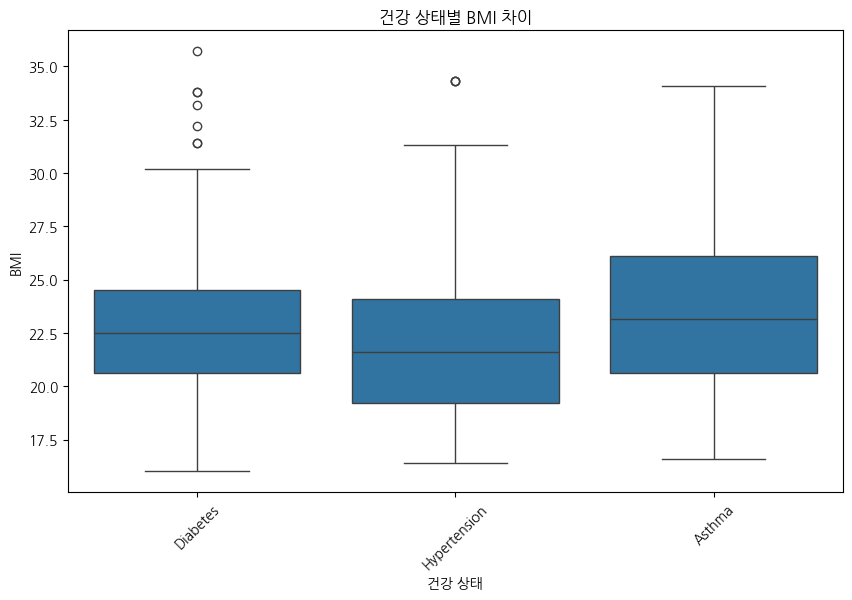

In [ ]:
# 체내 수분 함량과 BMI의 상관관계 분석
correlation = health_sample[['체내 수분 함량', 'BMI']].corr().iloc[0, 1]

if abs(correlation) > 0.3:  # 의미 있는 상관관계가 있는 경우
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='체내 수분 함량', y='BMI', data=health_sample, alpha=0.6)
    sns.regplot(x='체내 수분 함량', y='BMI', data=health_sample, scatter=False, color='red')
    plt.title('체내 수분 함량과 BMI의 관계')
    plt.xlabel('체내 수분 함량')
    plt.ylabel('BMI')
    plt.show()
else:
    # 건강 상태와 BMI 분석
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='건강 상태', y='BMI', data=health_sample)
    plt.xticks(rotation=45)
    plt.title('건강 상태별 BMI 차이')
    plt.xlabel('건강 상태')
    plt.ylabel('BMI')
    plt.show()


In [ ]:
# #위에꺼 5단위로 바꾼 버전인데.. 안예뻐서 버릴게요

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # 예제 데이터프레임 생성
# data = {
#     'Health_Status': ['Diabetes', 'Diabetes', 'Hypertension', 'Hypertension', 'Asthma', 'Asthma'],
#     'BMI': [22.5, 24.0, 20.0, 22.5, 27.5, 30.0]
# }
# df = pd.DataFrame(data)

# # 박스플롯 생성
# plt.figure(figsize=(10, 6))
# ax = sns.boxplot(data=df, x='Health_Status', y='BMI')

# # y축 단위를 5씩 높아지도록 설정
# min_bmi = int(df['BMI'].min() // 5 * 5)  # 최소값을 5로 나눈 후 내림
# max_bmi = int(df['BMI'].max() // 5 * 5 + 5)  # 최대값을 5로 나눈 후 올림
# plt.yticks(range(min_bmi, max_bmi + 1, 5))

# # 제목 및 축 라벨 설정
# plt.title("건강 상태별 BMI 차이")
# plt.xlabel("건강 상태")
# plt.ylabel("BMI")

# plt.show()





---



---



---



# **ID별, 월별 데이터**

In [ ]:
import pandas as pd

# 올바른 파일 경로 확인
# Make sure this path is correct by copying it from your Google Drive in Colab
data_zip_path = '/content/drive/MyDrive/1차 플젝/건강데이터_ID별_월별.csv'

# CSV 파일 읽기
health_month = pd.read_csv(data_zip_path, encoding = 'cp949')

# 데이터 확인
health_month.head()

,ID,나이,지속 시간,칼로리 소모,평균 심박수,수면 시간,스트레스 수준,매일 걸음수,체내 수분 함량,BMI,휴식 심박수,수축기 혈압,이완기 혈압,체력 수준,월,성별,운동 유형,강도,건강 상태,흡연 상태
0,1,56,68.421053,10.536842,122.368421,7.010526,5.263158,8591.315789,2.357895,19.6,69.5,110.7,72.9,0.789474,1,F,HIIT,Medium,NaN,Never
1,1,56,68.818182,10.977273,125.681818,7.086364,5.045455,9338.227273,2.618182,19.6,69.5,110.7,72.9,2.479091,2,F,Tennis,Medium,NaN,Never
2,1,56,69.000000,7.048000,120.880000,7.160000,4.600000,11008.920000,2.468000,19.6,69.5,110.7,72.9,4.476800,3,F,Yoga,Medium,NaN,Never
3,1,56,66.880000,10.080000,117.840000,6.884000,5.600000,10142.800000,2.616000,19.6,69.5,110.7,72.9,6.478000,4,F,Weight Training,Medium,NaN,Never
4,1,56,75.363636,12.559091,119.318182,7.104545,5.090909,9802.818182,2.518182,19.6,69.5,110.7,72.9,8.359545,5,F,Cycling,Medium,NaN,Never


In [ ]:
# 2000개 랜덤 샘플링 코드
health_month_sample =health_month.sample(n=2000, random_state=42)

# 샘플링된 데이터 확인
health_month_sample.head()


,ID,나이,지속 시간,칼로리 소모,평균 심박수,수면 시간,스트레스 수준,매일 걸음수,체내 수분 함량,BMI,휴식 심박수,수축기 혈압,이완기 혈압,체력 수준,월,성별,운동 유형,강도,건강 상태,흡연 상태
16461,1372,42,60.200000,13.560000,128.866667,7.266667,5.866667,7235.800000,2.600000,18.7,74.5,110.1,76.6,15.419333,10,F,Basketball,Medium,NaN,Never
23579,1965,57,66.562500,25.462500,127.000000,7.118750,5.500000,8386.812500,2.418750,27.2,77.5,133.7,69.6,19.405625,12,M,HIIT,High,Diabetes,Never
23640,1971,22,77.952381,13.914286,142.904762,6.771429,5.571429,8877.380952,2.338095,20.6,70.7,117.0,91.7,1.031429,1,M,Running,Medium,NaN,Former
25635,2137,32,66.375000,16.516667,139.125000,6.716667,5.083333,10596.375000,2.458333,22.8,68.4,104.1,63.8,6.585833,4,M,Running,Medium,NaN,Never
8840,737,56,61.250000,16.512500,119.687500,6.768750,6.000000,7002.375000,2.600000,24.3,75.2,115.7,102.2,14.116250,9,F,Tennis,Low,NaN,Never


<ipython-input-27-424b5c603c1b>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=health_month_sample, x="월", y="BMI", estimator="mean", ci=None, marker="o")


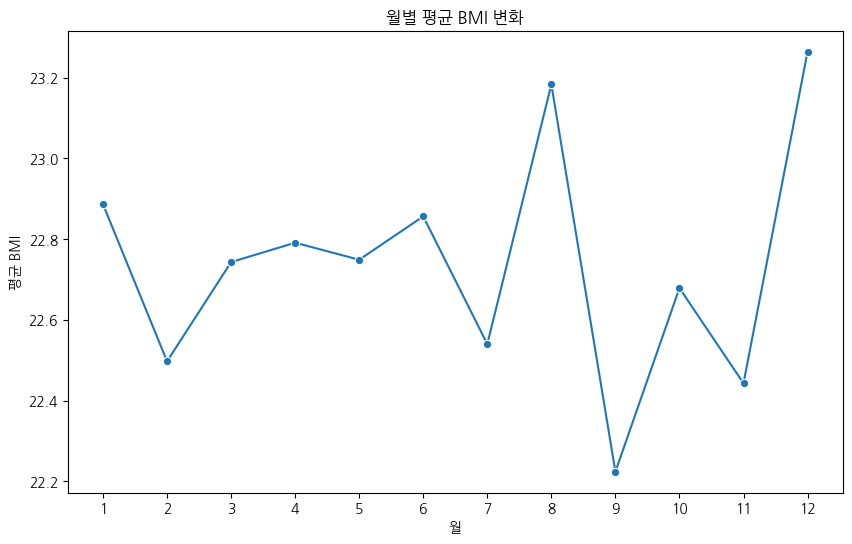

<ipython-input-27-424b5c603c1b>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=health_month_sample, x="월", y="지속 시간", estimator="mean", ci=None, marker="o")


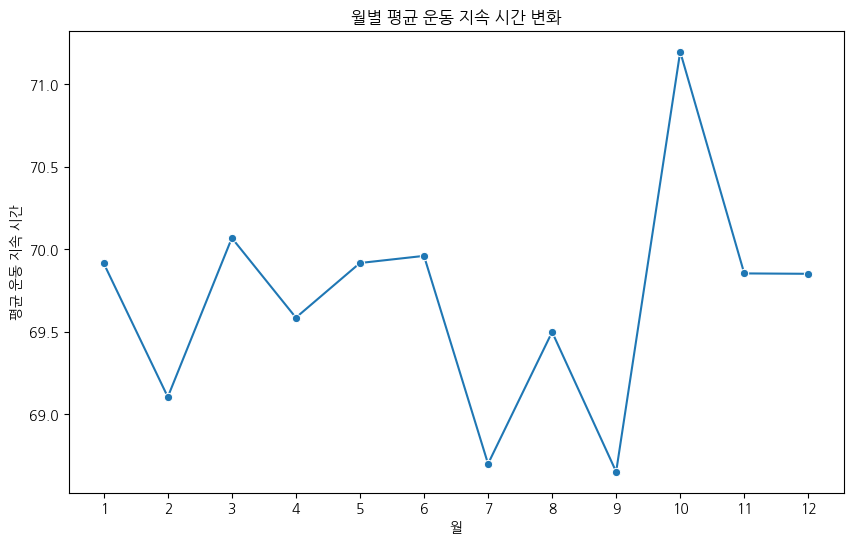

<ipython-input-27-424b5c603c1b>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=health_month_sample, x="월", y="칼로리 소모", estimator="mean", ci=None, marker="o")


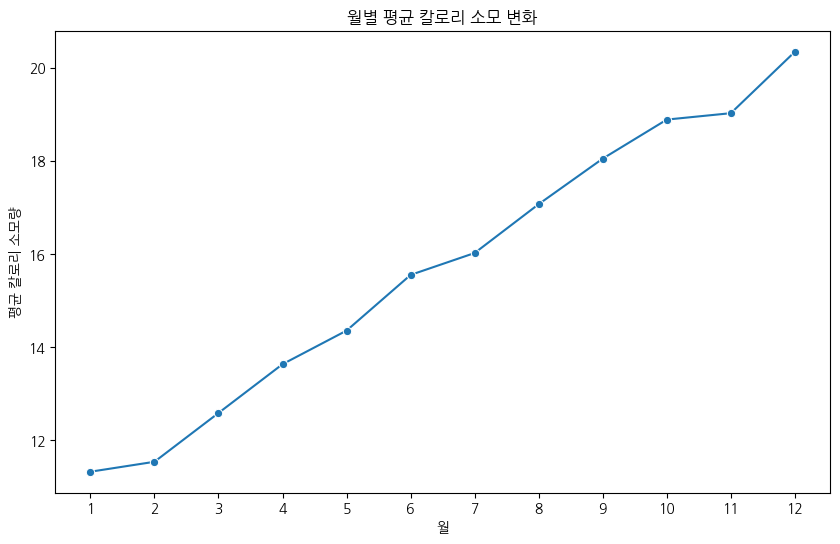

<ipython-input-27-424b5c603c1b>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=health_month_sample, x="월", y="체내 수분 함량", estimator="mean", ci=None, marker="o")


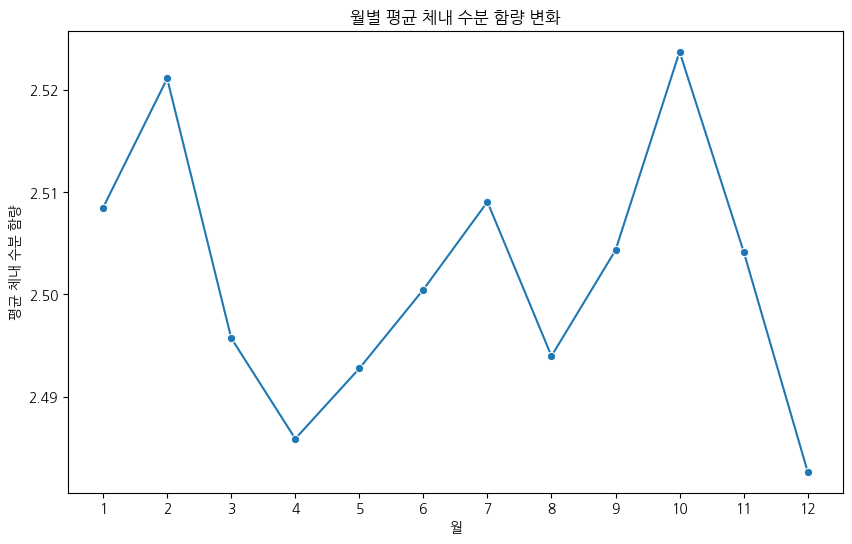

<ipython-input-27-424b5c603c1b>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=health_month_sample, x="월", y="스트레스 수준", estimator="mean", ci=None, marker="o")


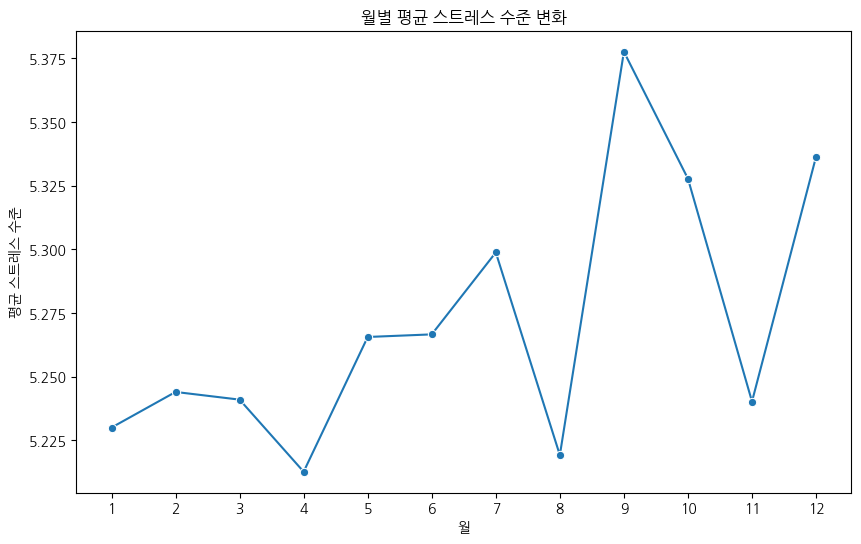

In [ ]:
#건강데이터_ID, 월별 구분ver.

# 월별 평균 BMI 변화 분석
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_month_sample, x="월", y="BMI", estimator="mean", ci=None, marker="o")
plt.title("월별 평균 BMI 변화")
plt.xlabel("월")
plt.ylabel("평균 BMI")
plt.xticks(range(1, 13))
plt.show()

# 월별 평균 지속 시간 변화 분석
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_month_sample, x="월", y="지속 시간", estimator="mean", ci=None, marker="o")
plt.title("월별 평균 운동 지속 시간 변화")
plt.xlabel("월")
plt.ylabel("평균 운동 지속 시간")
plt.xticks(range(1, 13))
plt.show()

# 월별 평균 칼로리 소모 변화 분석
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_month_sample, x="월", y="칼로리 소모", estimator="mean", ci=None, marker="o")
plt.title("월별 평균 칼로리 소모 변화")
plt.xlabel("월")
plt.ylabel("평균 칼로리 소모량")
plt.xticks(range(1, 13))
plt.show()

# 월별 평균 체내 수분 함량 변화 분석
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_month_sample, x="월", y="체내 수분 함량", estimator="mean", ci=None, marker="o")
plt.title("월별 평균 체내 수분 함량 변화")
plt.xlabel("월")
plt.ylabel("평균 체내 수분 함량")
plt.xticks(range(1, 13))
plt.show()

# 월별 평균 스트레스 수준 변화 분석
plt.figure(figsize=(10, 6))
sns.lineplot(data=health_month_sample, x="월", y="스트레스 수준", estimator="mean", ci=None, marker="o")
plt.title("월별 평균 스트레스 수준 변화")
plt.xlabel("월")
plt.ylabel("평균 스트레스 수준")
plt.xticks(range(1, 13))
plt.show()




---



---



---



# **BMI분류 데이터**

In [ ]:
#건강데이터_BMI분류 버전

import pandas as pd

# 올바른 파일 경로 확인
# Make sure this path is correct by copying it from your Google Drive in Colab
data_zip_path = '/content/drive/MyDrive/1차 플젝/건강데이터_bmi_분류.csv'

# CSV 파일 읽기
health_bmi = pd.read_csv(data_zip_path, encoding = 'cp949')

# 데이터 확인
health_bmi.head()

,ID,날짜,나이,성별,운동 유형,지속 시간,강도,칼로리 소모,평균 심박수,수면 시간,...,매일 걸음수,체내 수분 함량,BMI,휴식 심박수,수축기 혈압,이완기 혈압,건강 상태,흡연 상태,체력 수준,BMI 분류
0,1,2024-01-01,56,F,Dancing,41,Low,3.3,103,6.6,...,7128,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.04,정상
1,1,2024-01-04,56,F,Swimming,28,Low,2.9,102,8.1,...,7925,1.8,19.6,69.5,110.7,72.9,NaN,Never,0.07,정상
2,1,2024-01-05,56,F,Swimming,21,Medium,2.6,126,6.2,...,7557,2.7,19.6,69.5,110.7,72.9,NaN,Never,0.09,정상
3,1,2024-01-07,56,F,Weight Training,99,Medium,10.7,141,7.2,...,11120,2.6,19.6,69.5,110.7,72.9,NaN,Never,0.21,정상
4,1,2024-01-09,56,F,Swimming,100,Medium,12.7,112,7.1,...,5406,1.5,19.6,69.5,110.7,72.9,NaN,Never,0.33,정상


<ipython-input-38-f6076c8855cc>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calories_per_bmi, x="BMI 분류", y="칼로리 소모", palette="coolwarm")


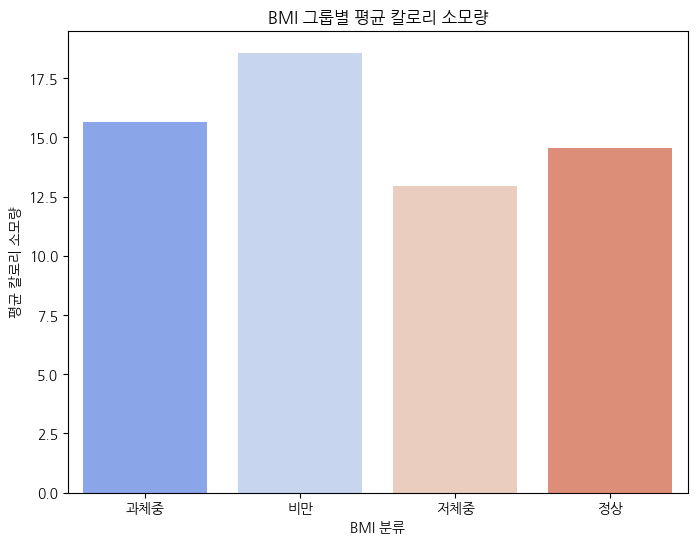

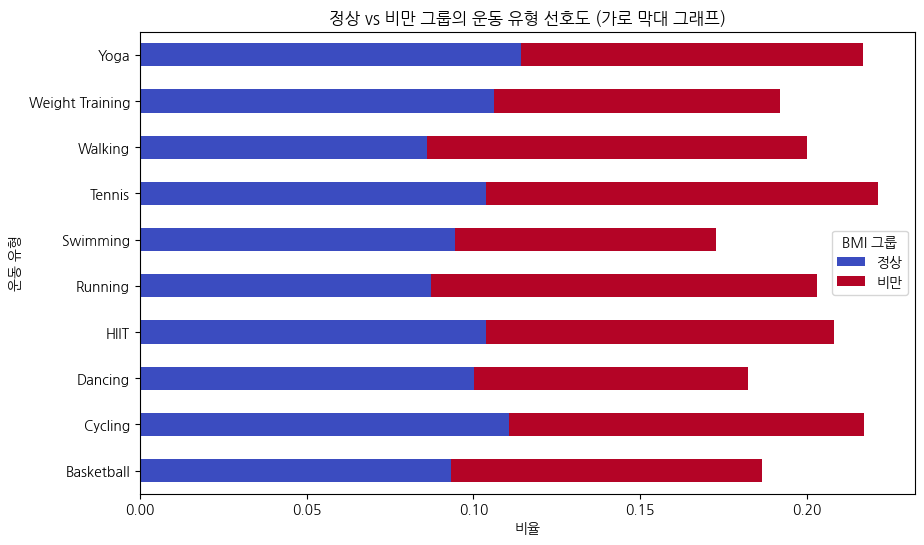

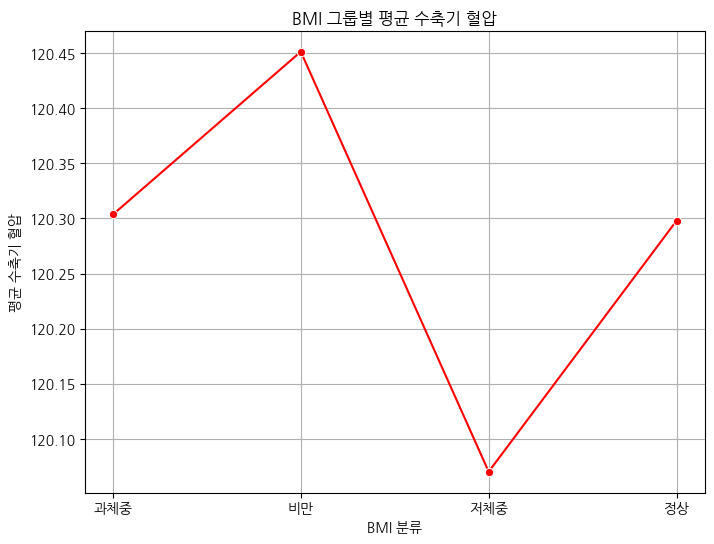

In [ ]:
# # 새로 업로드된 파일 로드
# file_path = "/content/drive/MyDrive/1차 플젝/건강데이터_bmi_분류.csv"
# df = pd.read_csv(file_path, encoding="EUC-KR")

# # 2000개 랜덤 샘플링
 df_sample = df.sample(n=2000, random_state=42)

# BMI 분류별 평균 칼로리 소모량 계산
calories_per_bmi = df_sample.groupby("BMI 분류")["칼로리 소모"].mean().reset_index()

# 정상 체중 그룹과 비만 그룹의 운동 유형 선호도 비교
exercise_type_normal = df_sample[df_sample["BMI 분류"] == "정상"]["운동 유형"].value_counts(normalize=True)
exercise_type_obese = df_sample[df_sample["BMI 분류"] == "비만"]["운동 유형"].value_counts(normalize=True)

# 데이터프레임 변환 및 정리
exercise_df = pd.DataFrame({"정상": exercise_type_normal, "비만": exercise_type_obese}).fillna(0)

# BMI 분류별 평균 수축기 혈압 계산
systolic_bp_per_bmi = df_sample.groupby("BMI 분류")["수축기 혈압"].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# 1. 비만 그룹의 평균 칼로리 소모량이 다른 그룹보다 낮은지 확인 (막대 그래프)
plt.figure(figsize=(8, 6))
sns.barplot(data=calories_per_bmi, x="BMI 분류", y="칼로리 소모", palette="coolwarm")
plt.title("BMI 그룹별 평균 칼로리 소모량")
plt.xlabel("BMI 분류")
plt.ylabel("평균 칼로리 소모량")
plt.show()

# 정상 vs 비만 그룹의 운동 유형 선호도를 가로 막대 그래프로 표현
exercise_df.plot(kind="barh", stacked=True, figsize=(10, 6), colormap="coolwarm")

plt.title("정상 vs 비만 그룹의 운동 유형 선호도 (가로 막대 그래프)")
plt.xlabel("비율")
plt.ylabel("운동 유형")
plt.legend(title="BMI 그룹")
plt.show()


# 3. 수축기 혈압과 BMI 분류 간의 관계 (라인 차트)
plt.figure(figsize=(8, 6))
sns.lineplot(data=systolic_bp_per_bmi, x="BMI 분류", y="수축기 혈압", marker="o", linestyle="-", color="red")
plt.title("BMI 그룹별 평균 수축기 혈압")
plt.xlabel("BMI 분류")
plt.ylabel("평균 수축기 혈압")
plt.grid(True)
plt.show()


체중이 무거울수록 에너지 소모량 증가

체중이 높은 사람일수록 같은 운동을 하더라도 더 많은 칼로리를 소모합니다.
예를 들어, 체중 60kg인 사람이 30분 걷기와 체중 100kg인 사람이 30분 걷기는 후자가 더 많은 에너지를 사용하게 됩니다.

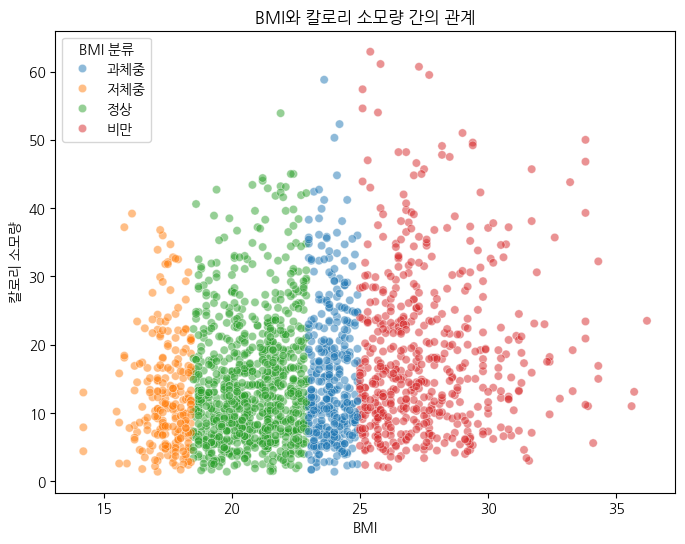

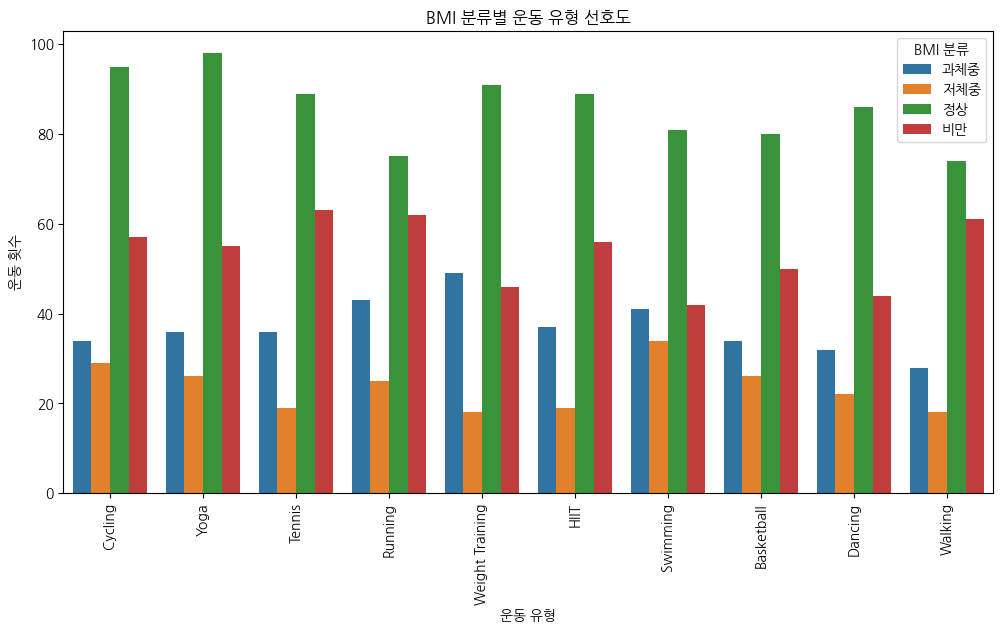

In [ ]:
# 1. BMI와 칼로리 소모량 간의 관계 분석 (산점도)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sample, x="BMI", y="칼로리 소모", hue="BMI 분류", alpha=0.5)
plt.title("BMI와 칼로리 소모량 간의 관계")
plt.xlabel("BMI")
plt.ylabel("칼로리 소모량")
plt.legend(title="BMI 분류")
plt.show()

# 2. BMI 분류별 운동 유형 선호도 비교 (막대 그래프)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sample, x="운동 유형", hue="BMI 분류", order=df_sample["운동 유형"].value_counts().index)
plt.xticks(rotation=90)
plt.title("BMI 분류별 운동 유형 선호도")
plt.xlabel("운동 유형")
plt.ylabel("운동 횟수")
plt.legend(title="BMI 분류")
plt.show()


BMI와 칼로리 소모량 간의 관계 (산점도)

전반적으로 BMI가 높을수록 칼로리 소모량이 증가하는 경향이 보입니다.
이는 체중이 많을수록 동일한 운동을 하더라도 더 많은 에너지를 소비하기 때문으로 해석할 수 있습니다.
하지만 BMI가 낮다고 해서 칼로리 소모량이 무조건 적은 것은 아님 (운동량이 중요한 변수)
비만 그룹 내에서도 칼로리 소모량 차이가 큼 (운동을 많이 하는 사람과 적게 하는 사람의 차이)

BMI 분류별 운동 유형 선호도 (막대 그래프)

비만 그룹과 정상 체중 그룹이 선호하는 운동 유형이 차이가 있을 수 있습니다.
예를 들어, 비만 그룹이 높은 강도의 운동(예: 러닝, 사이클링)을 선호하는지 또는 저강도의 운동(예: 걷기, 요가)을 선호하는지 확인할 수 있습니다.
만약 비만 그룹이 칼로리 소모량이 많음에도 불구하고 가벼운 운동을 선호한다면, 체중 자체로 인해 높은 에너지를 소모하는 것일 수 있습니다.

🔍 추가적인 해석 가능성

비만 그룹의 칼로리 소모량이 높은 이유는 단순히 체중이 많기 때문일 가능성이 큼
정상/저체중 그룹이 더 활동적이라는 가설은 꼭 맞지 않을 수도 있음
비만 그룹이 적극적으로 운동을 하는 경향이 있는지 추가로 확인할 필요가 있음

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # BMI 분류별 칼로리 소모 분포
# plt.figure(figsize=(10, 6))
# sns.boxplot(x="BMI 분류", y="칼로리 소모", data=health_bmi)
# plt.title("BMI 분류별 칼로리 소모 분포")
# plt.xlabel("BMI 분류")
# plt.ylabel("칼로리 소모")
# plt.xticks(rotation=45)
# plt.show()

# # BMI와 칼로리 소모 간의 관계 (산점도)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x="BMI", y="칼로리 소모", hue="BMI 분류", data=health_bmi, alpha=0.6)
# plt.title("BMI와 칼로리 소모 간의 관계")
# plt.xlabel("BMI")
# plt.ylabel("칼로리 소모")
# plt.show()

# # BMI 분류별 평균 칼로리 소모
# bmi_calories_mean = health_bmi.groupby("BMI 분류")["칼로리 소모"].mean().sort_values()
# plt.figure(figsize=(10, 6))
# sns.barplot(x=bmi_calories_mean.index, y=bmi_calories_mean.values)
# plt.title("BMI 분류별 평균 칼로리 소모")
# plt.xlabel("BMI 분류")
# plt.ylabel("평균 칼로리 소모")
# plt.xticks(rotation=45)
# plt.show()




---



---



---



# **인사이트, 결론**

In [ ]:
# BMI 분류별 운동 유형 수행 횟수 분석 과정

# BMI 분류별 운동 유형 수행 횟수를 집계
bmi_exercise_counts = health_bmi.groupby(["BMI 분류", "운동 유형"]).size().reset_index(name="횟수")

# 각 BMI 분류별 수행 횟수가 가장 많은 운동 유형 찾기
bmi_top_exercises = bmi_exercise_counts.loc[bmi_exercise_counts.groupby("BMI 분류")["횟수"].idxmax()]

# 데이터 프레임을 시각적으로 출력
print(bmi_exercise_counts)


   BMI 분류            운동 유형     횟수
0     과체중       Basketball  12670
1     과체중          Cycling  12466
2     과체중          Dancing  12895
3     과체중             HIIT  12797
4     과체중          Running  12378
5     과체중         Swimming  12263
6     과체중           Tennis  12470
7     과체중          Walking  12648
8     과체중  Weight Training  12661
9     과체중             Yoga  12937
10     비만       Basketball  17987
11     비만          Cycling  18096
12     비만          Dancing  18094
13     비만             HIIT  18637
14     비만          Running  17815
15     비만         Swimming  17676
16     비만           Tennis  17801
17     비만          Walking  17716
18     비만  Weight Training  18236
19     비만             Yoga  18646
20    저체중       Basketball   7856
21    저체중          Cycling   7847
22    저체중          Dancing   7737
23    저체중             HIIT   7760
24    저체중          Running   7467
25    저체중         Swimming   7545
26    저체중           Tennis   7933
27    저체중          Walking   7697
28    저체중  Wei

In [ ]:
import pandas as pd

# 데이터프레임 (bmi_exercise_counts) 저장할 경로 설정
output_file_path = "/content/drive/MyDrive/1차 플젝/BMI유형별 추천 운동 분석.csv"

# CSV 파일 저장
bmi_exercise_counts.to_csv(output_file_path, index=False, encoding="utf-8-sig")

print(f"파일이 Google Drive에 저장되었습니다: {output_file_path}")


파일이 Google Drive에 저장되었습니다: /content/drive/MyDrive/1차 플젝/BMI유형별 추천 운동 분석.csv


**분석 과정:**

BMI 분류별 운동 수행 횟수 집계

각 BMI 분류에서 수행된 운동 유형과 해당 횟수를 계산.
가장 많이 수행된 운동 유형 찾기

각 BMI 분류별로 가장 많이 수행된 운동 유형을 선정.

# **<<BMI 유형별 추천 운동 리스트>>**


저체중: 테니스 (Tennis)

활동량이 많고 전신을 사용하는 운동으로, 체력과 근력을 함께 기를 수 있음.
심폐 지구력을 높이고 신체 균형을 잡는 데 효과적.
단점: 체중 증가를 원할 경우, 추가적으로 근력 운동 병행이 필요.


정상: 웨이트 트레이닝 (Weight Training)

근육량을 증가시키고 기초 대사량을 높이는 데 도움.
다양한 부위를 단련할 수 있어 체형 유지와 개선에 효과적.
단점: 적절한 휴식과 영양 섭취가 필수.


과체중: 요가 (Yoga)

유연성과 근력을 길러주며 체중 감량에도 도움.
신체 부담이 적어 지속적으로 수행하기 좋음.
단점: 유산소 운동과 병행하면 더 효과적.


비만: 요가 (Yoga)

관절 부담이 적고, 체중 감량에 무리가 없는 운동.
근력 강화 및 스트레스 해소에도 유익함.
단점: 추가적인 유산소 운동(빠른 걷기, 수영 등)을 함께 하면 효과 상승.